In [145]:
import skimage
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image, ImageOps
%matplotlib inline
skimage.__version__

'0.17.2'

<class 'numpy.ndarray'>
(971, 766)


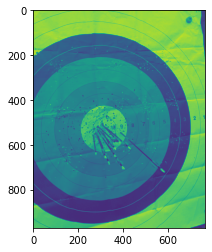

In [146]:
image_test = PIL.Image.open('./res/strzalyTest.png')
image_test = np.asarray(ImageOps.grayscale(image_test))
# image_test = ImageOps.grayscale(image_test)
plt.imshow(image_test)
print(type(image_test))
print(image_test.shape)

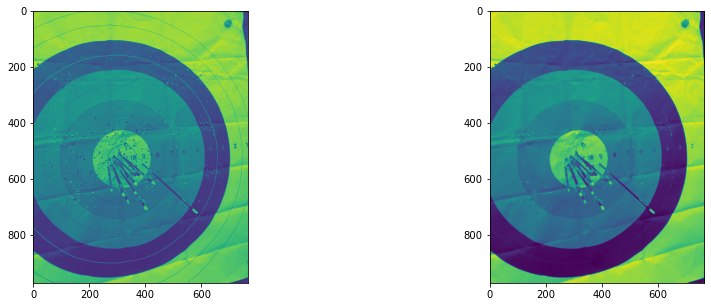

In [147]:
from skimage import filters
# coins = skimage.data.coins()
image_filtered = filters.median(image_test, selem=np.ones((5, 5)))

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))
ax0.imshow(image_test)
ax1.imshow(skimage.morphology.area_closing(image_filtered))

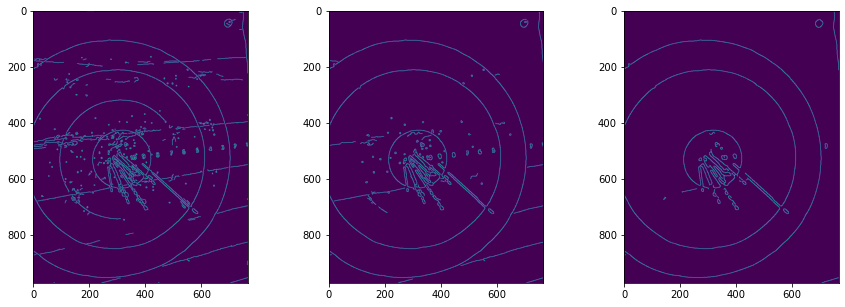

In [148]:
f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(15,5))
ax0.imshow(skimage.feature.canny(image_filtered, sigma=1))
ax1.imshow(skimage.feature.canny(image_filtered, sigma=2))
ax2.imshow(skimage.feature.canny(image_filtered, sigma=3))

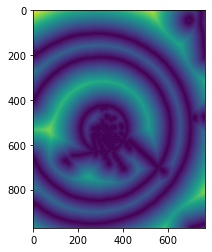

In [149]:
from scipy.ndimage import distance_transform_edt

edges = skimage.feature.canny(image_filtered, sigma=2.78)
dt = distance_transform_edt(~edges)

plt.imshow(dt);

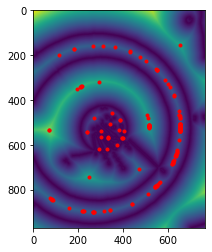

In [150]:
dis = 15
local_max = skimage.feature.peak_local_max(dt, indices=False, min_distance=dis)
peak_idx = skimage.feature.peak_local_max(dt, indices=True, min_distance=dis)
plt.plot(peak_idx[:,1], peak_idx[:,0], 'r.')
plt.imshow(dt);

In [151]:
from skimage import measure
markers = measure.label(local_max)

d:\python\lib\site-packages\skimage\morphology\_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


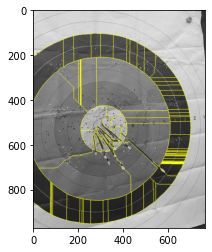

In [152]:
from skimage import morphology, segmentation

labels = morphology.watershed(-dt, markers)
plt.imshow(segmentation.mark_boundaries(image_test, labels))

d:\python\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  This is separate from the ipykernel package so we can avoid doing imports until
d:\python\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  after removing the cwd from sys.path.


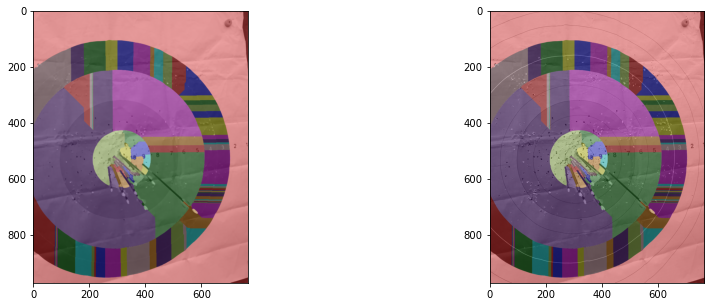

In [153]:
from skimage import color
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))
ax0.imshow(color.label2rgb(labels, image=image_filtered))
ax1.imshow(color.label2rgb(labels, image=image_test))

d:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  """Entry point for launching an IPython kernel.


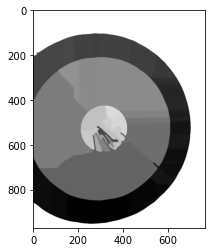

In [154]:
plt.imshow(color.label2rgb(labels, image=image_test, kind='avg'), cmap='gray')

In [155]:
# measure.regionprops?

(array([16., 21.,  5.,  4.,  3.,  9.,  0.,  2.,  1.,  2.,  5.,  4.,  1.,
         1.,  0.,  4.,  4.,  1.,  0.,  1.]),
 array([ 35.11914324,  43.37135088,  51.62355853,  59.87576617,
         68.12797382,  76.38018146,  84.63238911,  92.88459676,
        101.1368044 , 109.38901205, 117.64121969, 125.89342734,
        134.14563498, 142.39784263, 150.65005027, 158.90225792,
        167.15446556, 175.40667321, 183.65888085, 191.9110885 ,
        200.16329614]),
 <a list of 20 Patch objects>)

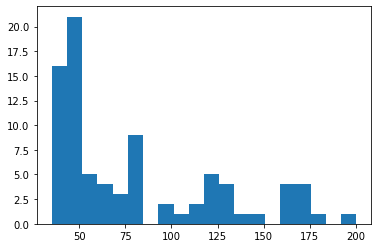

In [156]:
regions = measure.regionprops(labels, intensity_image=image_test)
regions_means = [r.mean_intensity for r in regions]
plt.hist(regions_means, bins=20)

In [157]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)

regions_means = np.array(regions_means).reshape(-1,1)
regions_means

array([[200.16329614],
       [ 77.5046492 ],
       [ 76.74151609],
       [ 77.49016497],
       [ 78.20080227],
       [ 82.05484226],
       [ 77.95719064],
       [ 75.32270916],
       [ 80.2397287 ],
       [ 76.70103655],
       [ 75.81629989],
       [ 72.36707805],
       [ 65.34650456],
       [125.72916293],
       [ 63.44006753],
       [124.29586291],
       [126.54390244],
       [126.68564356],
       [126.79361022],
       [ 60.7680686 ],
       [129.1064227 ],
       [ 59.13429664],
       [ 60.46425596],
       [ 55.20984081],
       [176.13606994],
       [ 53.71766849],
       [119.8753291 ],
       [ 53.26691042],
       [ 55.28218602],
       [160.23743247],
       [111.3338074 ],
       [173.23749208],
       [167.43331285],
       [ 48.34299792],
       [106.77093807],
       [115.48811596],
       [166.80462185],
       [173.48407643],
       [ 83.45299145],
       [165.42909567],
       [138.77398374],
       [123.97142857],
       [167.95758929],
       [ 51

In [158]:
model.fit(regions_means)
print(model.cluster_centers_)

[[ 52.56986535]
 [140.35868588]]


In [159]:
bg_fg_labels = model.predict(regions_means)
bg_fg_labels

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [160]:
classified_labels = labels.copy()
for bg_fg, region in zip(bg_fg_labels, regions):
    classified_labels[tuple(region.coords.T)] = bg_fg

d:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  """Entry point for launching an IPython kernel.


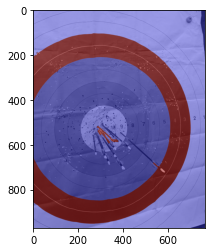

In [161]:
plt.imshow(color.label2rgb(classified_labels, image=image_test))